<p align="center"><img src="https://raw.githubusercontent.com/ravijagtap/datascience/main/IPL_DATA_ANALYSIS/images/Header.jpg"  /></p>

---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
  1.1 [**Tournament Format**](#Section11)<br>
  1.2 [**Prize Money**](#Section12)<br>
  1.3 [**Current Teams (2020)**](#Section13)<br>
  1.4 [**Current Points Table**](#Section14)<br>
2. [**Problem Statement**](#Section2)<br>
  2.1 [**Generic Stats**](#Section21)<br>
  2.2 [**Team Stats**](#Section22)<br>
  2.3 [**Player Stats - Batting**](#Section23)<br>
  2.4 [**Player Stats - Bowling**](#Section24)<br>
  2.5 [**Player Stats - Fielding**](#Section25)<br>
  2.6 [**Patnership Stats**](#Section26)<br>
  2.7 [**Duckworth–Lewis Method**](#Section27)<br>  
3. [**Installing & Importing Libraries**](#Section3)<br>
  3.1 [**Installing Libraries**](#Section31)<br>
  3.2 [**Upgrading Libraries**](#Section32)<br>
  3.3 [**Importing Libraries**](#Section33)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Data Profiling**](#Section5)<br>
6. [**Data Pre-Processing**](#Section6)<br>
7. [**Exploratory Data Analysis**](#Section7)<br>
  7.1 [**Generic Stats**](#Section71)<br>
  7.2 [**Team Stats**](#Section72)<br>
  7.3 [**Player Stats - Batting**](#Section73)<br>
  7.4 [**Player Stats - Bowling**](#Section74)<br>
  7.5 [**Player Stats - Fielding**](#Section75)<br>
  7.6 [**Patnership Stats**](#Section76)<br>
  7.7 [**Duckworth–Lewis Method**](#Section77)<br> 
8. [**Summarization**](#Section8)</br>
  8.1 [**Conclusion**](#Section81)</br>
  8.2 [**Actionable Insights**](#Section81)</br>
  


---

---
<a name = Section1></a>                                                                      
# **1. Introduction**                                                                                              
---

The Indian Premier League (IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities or states in India. The league was founded by the Board of Control for Cricket in India (BCCI) in 2008. The IPL has an exclusive window in ICC Future Tours Programme.

There have been twelve seasons of the IPL tournament. The current IPL title holders are the Mumbai Indians, who won the 2019 season. The venue for the 2020 season has been moved, due to the ongoing COVID-19 pandemic; games are now taking place in the United Arab Emirates from 19 September through 10 November 2020.

<a name = Section11></a>
### **1.1 Tournament format**

Currently, with eight teams, each team plays each other twice in a home-and-away round-robin format in the league phase. At the conclusion of the league stage, the top four teams will qualify for the playoffs. The top two teams from the league phase will play against each other in the first Qualifying match, with the winner going straight to the IPL final and the loser getting another chance to qualify for the IPL final by playing the second Qualifying match. Meanwhile, the third and fourth place teams from league phase play against each other in an eliminator match and the winner from that match will play the loser from the first Qualifying match. The winner of the second Qualifying match will move onto the final to play the winner of the first Qualifying match in the IPL Final match, where the winner will be crowned the Indian Premier League champions.

<a name = Section12></a>
### **1.2 Prize money**

The 2019 season of the IPL offered a total prize money of ₹500 million (US\\$7.0 million), with the winning team netting ₹200 million (US\\$2.8 million). The first and second runners up received ₹125 million (US\\$1.8 million) and ₹87.5 million (US\\$1.2 million), respectively, with the fourth placed team also winning ₹87.5 million (US\\$1.2 million). The other teams are not awarded any prize money. The IPL rules mandate that half of the prize money must be distributed among the players.

<a name = Section13></a>
### **1.3 Current Teams (2020)**

- Chennai Super Kings	
- Delhi Capitals	
- Kings XI Punjab	
- Kolkata Knight Riders	
- Mumbai Indians	
- Rajasthan Royals	
- Royal Challengers Bangalore	
- Sunrisers Hyderabad

---
<a name = Section2></a>
# **2. Problem Statement**
---

The IPL is the most-attended cricket league in the world and in 2014 ranked sixth by average attendance among all sports leagues.

To enchance the capabilities of players, to decide on team composition and stratergies, franchises may need concrete and precise analysis over the past plays & performance stats of the player and the team.

Getting the deeper understanding of the data is not possible using the traditional methods.

**Mumbai Indians** franchise owners needs to know all these stats to improve their chances on winning in the upcoming IPL seasons.

So for this analysis **Mumbai Indians** is the team we will be doing analysis for and **Wankhede Stadium** is the home ground.

<a name = Section21></a>
### **2.1 Generic Stats**

* How many seasons we’ve got in the dataset?
* How many matches we’ve got in the dataset?
* How many matches were played in each season?
* The Number of matches played in each venue?
* Match Winners based on Season Year?
* Which stadium is best for winning by runs?
* Has Toss-winning helped in winning matches?
* Which stadium is best for winning by wickets?
* Does batting first or bowling first helped in match winning?
* In which city does Weather affected matches?
* Which season had the most number of matches?
* Which venue is best for chasing?
* Which venue is best for defending?
* Which city hosted the most number of matches?
* Toss Call for a given venue

<a name = Section22></a>
### **2.2 Team Stats**

* No. of wins of each team in 2018
* Which Team/Teams had won by maximum runs?
* Which Team/Teams had won by maximum wicket?
* Which Team has lost the match by more than 100 runs or by 8 or more wickets and how many times?
* How many games were played till the last ball
* Which Team had won by closest Margin (minimum runs)?
* Team with Highest Net Run Rate in 2017
* which team won most games while batting first
* which team won most games while bowling first
* which team won most games when they won the toss
* which team won most games when they won the toss and batted first
* which team won most games when they won the toss and bowled first
* Which day is lucky for mumbai indians?
* For Mumbai Indians which stadium is best when they win the toss?
* Which is the best-chasing team?
* Which is the best defending team?
* Which team is the most successful in IPL till now?
* Which team won the most number of matches in non-home ground?
* which team played most final in ipl?
* 

<a name = Section23></a>
### **2.3 Player Stats - Batting**

* Which player got the most number of MOM
* Which player got the most number of MOM agains Chennai Super Kings
* Which Stadium is best for CH Gayle (in terms of most MOMs)
* Which Stadium is best for CH Gayle (in terms of most run scored)
* Which player scored most runs in powerplay
* which player hit the most number of 4s 
* which player hit the most number of 6s 
* player with highest and lowest strike rate
* which batsman has the highest average
* which player has most number of ducks?
* Player with most centuries
* Player with most half-centuries

<a name = Section24></a>
### **2.4 Player Stats - Bowling**

* which bowler was economical in powerplay in 2018 edition of IPL?
* which bowler was economical overall in 2018 edition of IPL?
* which bowler took more wickets in powerplay?
* which bowler has most wickets?
* which bowler is the most economical bowlere in all edition of IPL?
* which bowler has the most maidens overs
* which bowler has the most maidens wicket overs
* which bowler has dismissed Virat Kohli the most?
* which bowler has given least extra runs?
* which bowler gave most dot balls in ipl?
* which bowler conceded most sixes in ipl?

<a name = Section25></a>
### **2.5 Player Stats - Fielding**

* Most number of runouts
* Most number or catches

<a name = Section26></a>
### **2.6 Patnership stats**

* which patnership is the most sucessfull in 2017 edition of IPL
* which patnership is the most sucessfull in IPL

<a name = Section27></a>
### **2.7 Duckworth–Lewis method**

* When Duckworth–Lewis method was applied, then team batting first win most games or bowling first

---
<a id = Section3></a>
# **3. Installing & Importing Libraries**
---

<a id = Section31></a>
### **3.1 Installing Libraries**

In [ ]:
!pip install -q datascience                                         
!pip install -q pandas-profiling                                    

<a id = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync.

- Make sure not to execute the cell under Installing Libraries and Upgrading Libraries again after restarting the runtime.

In [ ]:
!pip install -q --upgrade pandas-profiling                          # Upgrading pandas profiling to the latest version

<a id = Section33></a>
### **3.3 Importing Libraries**

In [451]:
### **Importing Libraries**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)  

import warnings
warnings.filterwarnings('ignore') 

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

We will use below 2 datasets

1. Matches - https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/matches.csv

This dataset contains details related to the match such as location, contesting teams, umpires, results, etc


|Id|Column|Description|
|:--|:--|:--|
|01| id	| Match Id| 
|02| season	| Season Year| 
|03| city	| City in which the match as played |  
|04| date	| Date on which match was played| 
|05| team1	| Team Participating in the match|   
|06| team2	| Team Participating in the match|
|07| toss_winner| Team who won the toss|
|08| toss_decision| What team decided after wining the toss|
|09| result| if there was a result, tie or no result|
|10| dl_applied| Duckworth lewis method was applied or not|
|11| winner| Which team won the match|
|12| win_by_runs| Won by Runs |
|13| win_by_wickets| Won By Wickets|
|14| player_of_match| Man of the match|
|15| venue| Name of the stadium|
|16| umpire1| On Field Umpire 1|
|17| umpire2|On Field Umpire 2|
|18| umpire3|Third Umpire|


2. Deliveries - https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/deliveries.csv

This dataset is the ball-by-ball data of all the IPL matches including data of the batting team, batsman, bowler, non-striker, runs scored, etc

|Id|Column|Description|
|:--|:--|:--|
|01|match_id|Match Id|
|02|inning|1st or 2nd Inning |
|03|batting_team|Team Batting|
|04|bowling_team|Team Bowling|
|05|over|Over number|
|06|ball|Ball number in the over|
|07|batsman|Name of the Batsman at crease|
|08|non_striker|Name of Batsman at non-striker end|
|09|bowler|Bowler who bowled the over|
|10|is_super_over|Is this a super over|
|11|wide_runs|Runs on wide delivery|
|12|bye_runs|Bye Runs|
|13|legbye_runs|Legbye Runs|
|14|noball_runs|Runs on a noball delivery|
|15|penalty_runs|Penalty Runs|
|16|batsman_runs|Runs by Batsman|
|17|extra_runs|Total Extra Runs|
|18|total_runs|Total Runs (Total Extra + Runs by Batsman)|
|19|player_dismissed|Is Batsman dismissed on this delivery||
|20|dismissal_kind|How Batsman got dismissed|
|20|fielder|If its a caught or bowled then which fielder was involved|



#### Read Data from CSV ####

In [4]:
matches = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/matches.csv")
deliveries = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/deliveries.csv")

---
<a name = Section5></a>
# **5. Data Profiling**
---

Pandas has an open source module 'pandas_profiling' using which we can quickly do EDA using just few lines of code
It generates an interactive profile reports from a pandas DataFrame. The pandas df.describe() function is great but a little basic for serious EDA. pandas_profiling extends the pandas DataFrame with df.profile_report() for quick data analysis.

It can be installed using below command if not already installed.

#!pip install pandas_profiling==1.4.1


In [20]:
# import the required module
import pandas_profiling 

In [31]:
# matches dataset profiling
matches_profile = matches.profile_report(title="IPL Data Profiling before Data Processing of matches DF", progress_bar=False, minimal=True)
matches_profile.to_file(output_file="matches_profiling_before_processing.html")

In [33]:
# deliveries dataset profiling
deliveries_profile = deliveries.profile_report(title="IPL Data Profiling before Data processing of deliveries DF", progress_bar=False, minimal=True)
deliveries_profile.to_file(output_file="deliveries_profiling_before_processing.html")

The report can be downloaded from here 
https://github.com/ravijagtap/datascience/blob/main/IPL_DATA_ANALYSIS/matches_profiling_before_processing.html
https://github.com/ravijagtap/datascience/blob/main/IPL_DATA_ANALYSIS/deliveries_profiling_before_processing.html

**Observations from Pandas Profiling of '<em>matches</em>' Data set before Data Processing** <br><br>


###### **<em>matches</em> Data set** ######

__Dataset info__:
- Number of variables: 18
- Number of observations: 696
- Missing cells: 651 (5.2%)
- Duplicate Rows: 0

__Variables types__: 
- Numeric = 4
- Categorical = 13
- Boolean = 1

<br>

- There are overall **11 seasons** data in the data set**.

- **umpire3** has **636 (91.4%) missing values**.

- **city** has **7 (1.0%) missing values**.

- **player_of_match** has high cardinality **214 distinct values**.

- **CH Gayle** has got more **player_of_match (20 times)**.

- out of **696 matches**, we have got results for **686 matches**, **7 were tie matches** and **3 matches has no results**.

- there were overall **19 matches** where  **duckworth lewis** method was applied.

---

###### **<em>deliveries</em> Data set** ######

__Dataset info__:
- Number of variables: 21
- Number of observations: 1,64,750
- Missing cells: 472018 (13.6%)
- Duplicate Rows: 5

__Variables types__: 
- Numeric = 10
- Categorical = 10
- Boolean = 1

<br>

- **player_dismissed** and **dismissal_kind** has **156593 missing values**.

- **batsman** has high cardinality **488 distinct values**.

- **innings** has values as **3** and **4**, which means there were some matches in which super over was bowled.

---
<a name = Section6></a>
# **6. Data Preprocessing**
---

#### Get the dimensions of the datasets ####

**matches**

In [6]:
matches.shape

(696, 18)

- There are 696 rows and 18 columns in the matches dataset

###### View the different datatypes in datasets######

In [17]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               696 non-null    int64 
 1   season           696 non-null    int64 
 2   city             689 non-null    object
 3   date             696 non-null    object
 4   team1            696 non-null    object
 5   team2            696 non-null    object
 6   toss_winner      696 non-null    object
 7   toss_decision    696 non-null    object
 8   result           696 non-null    object
 9   dl_applied       696 non-null    int64 
 10  winner           693 non-null    object
 11  win_by_runs      696 non-null    int64 
 12  win_by_wickets   696 non-null    int64 
 13  player_of_match  693 non-null    object
 14  venue            696 non-null    object
 15  umpire1          695 non-null    object
 16  umpire2          695 non-null    object
 17  umpire3          60 non-null     ob

In [25]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


- Since **date** is not relevant and does not provide any additional insights for our analysis, we will drop this column
- **umpire1, umpire2 and umpire3** can also be dropped for same reason.


In [26]:
matches.drop(['date', 'umpire1', 'umpire2', 'umpire3'], axis=1, inplace=True)

In [45]:
# set id as the index column
matches.set_index('id', inplace=True)

In [46]:
matches.head()

,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,
1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
2,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
3,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
4,2017,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
5,2017,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


**deliveries**

In [12]:
deliveries.shape

(164750, 21)

There are 1,64,750 rows and 21 columns in the deliveries dataset

###### View the different datatypes in datasets######

In [19]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164750 entries, 0 to 164749
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          164750 non-null  int64 
 1   inning            164750 non-null  int64 
 2   batting_team      164750 non-null  object
 3   bowling_team      164750 non-null  object
 4   over              164750 non-null  int64 
 5   ball              164750 non-null  int64 
 6   batsman           164750 non-null  object
 7   non_striker       164750 non-null  object
 8   bowler            164750 non-null  object
 9   is_super_over     164750 non-null  int64 
 10  wide_runs         164750 non-null  int64 
 11  bye_runs          164750 non-null  int64 
 12  legbye_runs       164750 non-null  int64 
 13  noball_runs       164750 non-null  int64 
 14  penalty_runs      164750 non-null  int64 
 15  batsman_runs      164750 non-null  int64 
 16  extra_runs        164750 non-null  int

In [47]:
# set match_id as the index column
deliveries.set_index('match_id', inplace=True)

In [48]:
deliveries.head()

,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
match_id,,,,,,,,,,,,,,,,,,,,
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


###### Data Cleaning

In [137]:
#Replacing the Full names by short names
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

In [138]:
#Replacing the Full names by short names
deliveries.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

**Rising Pune Supergiant** is 2 times in the dataset one with name **Rising Pune Supergiant** and other as **Rising Pune Supergiants**, we replaced both with **RPS**

---
<a name = Section7></a>
# **7. Exploratory Data Analysis**
---
**Exploratory Data Analysis(EDA)** is an **approach to analyzing data sets** to **summarize** their **main characteristics**, often with **visual methods**. 


- It includes **cleaning, munging, combining, reshaping, slicing, dicing, and transforming data** for **analysis** purpose.


- The **primary goal of EDA** is to **maximize the analyst's insight into a data set** and into the **underlying structure of a data set**, while **providing all of the specific items** that an **analyst would want to extract from a data set**.

<a name = Section71></a>
### **7.1 Generic Stats**

######  7.1.1 How many seasons we’ve got in the dataset?

In [140]:
matches['season'].nunique()

11

In [141]:
matches['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018],
      dtype=int64)

In [142]:
matches['season'].min()

2008

In [143]:
matches['season'].max()

2018

- There are 11 seasons from 2008 to 2018

######  7.1.2 How many matches we’ve got in the dataset?

In [144]:
len(matches)

696

- Total 696 matches were played in the IPL season from 2008 to 2018

######  7.1.3 How many matches were played in each season

In [145]:
seasons = matches['season'].value_counts().to_frame()
seasons

,season
2013,76
2012,74
2011,73
2018,60
2016,60
2014,60
2010,60
2017,59
2015,59
2008,58


- This shows that most number of matches were played in the year of 2013 (76 matches)

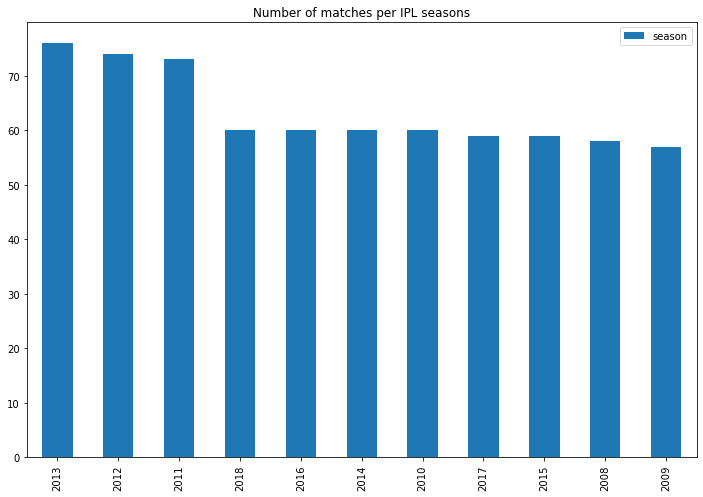

In [146]:
seasons.plot(kind="bar", title="Number of matches per IPL seasons", figsize=(12,8))

###### 7.1.4 The Number of matches played in each venue?

In [278]:
no_of_matches = matches['venue'].value_counts().to_frame()
no_of_matches.rename(columns={'venue': 'no_of_matches'}, inplace=True)
no_of_matches

,no_of_matches
M Chinnaswamy Stadium,73
Eden Gardens,70
Feroz Shah Kotla,67
Wankhede Stadium,66
"Rajiv Gandhi International Stadium, Uppal",56
"MA Chidambaram Stadium, Chepauk",49
Sawai Mansingh Stadium,40
"Punjab Cricket Association Stadium, Mohali",35
Maharashtra Cricket Association Stadium,21
Dr DY Patil Sports Academy,17


- M Chinnaswamy Stadium has hosted most matches (73)
- Wankhede Stadium is the 4th in the list and hosted 66 matches
- There were some matches played outside india as well, like in cities Kingsmead, St George's Park, etc

###### 7.1.5 Match Winners based on Season Year for Mumbai Indians?

In [279]:
no_of_wins = matches[matches['winner'] == 'MI'].groupby(['season'])['winner'].value_counts().to_frame()
no_of_wins.rename(columns={'winner': 'no_of_wins'}, inplace=True)
no_of_wins

,,no_of_wins
season,winner,
2008,MI,7
2009,MI,5
2010,MI,11
2011,MI,10
2012,MI,10
2013,MI,13
2014,MI,7
2015,MI,10
2016,MI,7


###### 7.1.6 number of matches each team won till now in the IPL history.

In [280]:
no_of_wins_by_team = matches['winner'].sort_values().value_counts().to_frame()
no_of_wins_by_team.rename(columns={'winner': 'no_of_wins_by_team'}, inplace=True)
no_of_wins_by_team

,no_of_wins_by_team
MI,98
CSK,90
KKR,86
RCB,79
KXIP,76
RR,70
DD,67
SRH,52
DC,29
RPS,15


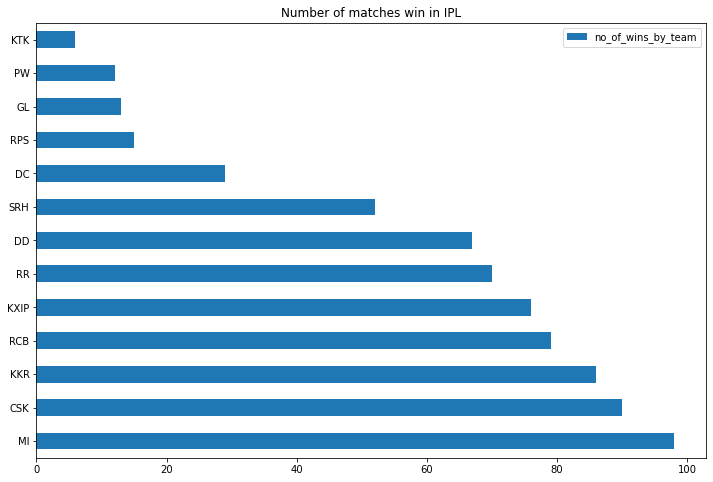

In [281]:
no_of_wins_by_team.plot(kind="barh", title="Number of matches win in IPL", figsize=(12,8))

- Mumbai Indians has won most of the matches till now (98 times)

###### Performance(no. of wins) of MI throughout different seasons(2008-2019)

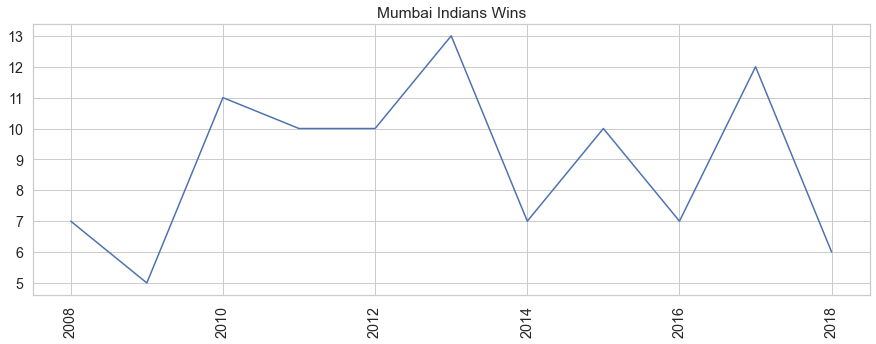

In [498]:
winner_per_season=matches.pivot_table(index=['winner','season'],aggfunc='size')
winner_per_season=pd.DataFrame(winner_per_season)
winner_per_season.rename(columns={0:'wins'},inplace=True)
winner_per_season.reset_index(inplace=True)
mi_wins=winner_per_season[winner_per_season['winner']=='MI']
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.title('Mumbai Indians Wins')
plt.plot('season','wins',data=mi_wins)

######  7.1.5 Has Toss-winning helped in winning matches?
Check for each team what is the winning percentage when the team won the toss

In [375]:
# toss and match wins by toss_winner
toss_winner_as_winner = matches[matches['winner'] == matches['toss_winner']].groupby(['toss_winner'])['winner'].count()

# total toss wins by toss_winner
total_toss_winner = matches.groupby(['toss_winner'])['winner'].count()

win_per_on_toss_win = toss_winner_as_winner / total_toss_winner * 100
win_per_on_toss_win = win_per_on_toss_win.to_frame()
win_per_on_toss_win.rename(columns={'winner': 'win_per_on_toss_win'}, inplace=True)
win_per_on_toss_win


,win_per_on_toss_win
toss_winner,
CSK,64.935065
DC,44.186047
DD,44.303797
GL,66.666667
KKR,56.321839
KTK,50.000000
KXIP,42.666667
MI,55.555556
PW,15.000000


- Mumbai Indians won only 55.5% of the matches in which they won the toss

In [202]:
win_per_on_toss_win['lost'] = 100 - win_per_on_toss_win['winner']

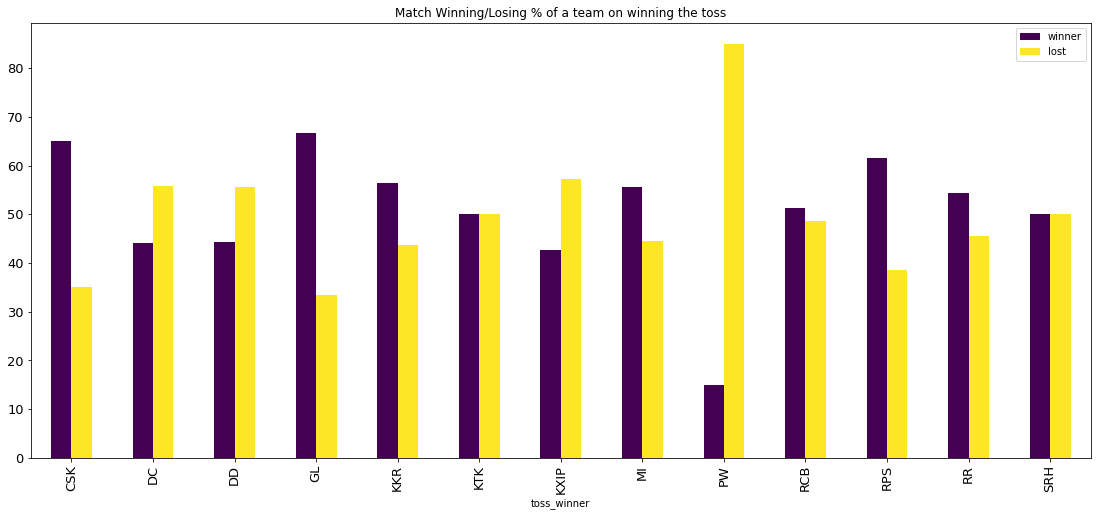

In [203]:
win_per_on_toss_win.plot.bar(figsize=(19,8), title="Match Winning/Losing % of a team on winning the toss",fontsize=13,
                                                            cmap='viridis')

######  7.1.4 Which are the top 5 stadiums for winning by runs (atleast 10 matches should have been played on the venue)?

In [290]:
atleast_10_mtch_at_venue = matches['venue'].value_counts().to_frame()
# Venues where atleast 10 matches are played
atleast_10_mtch_at_venue = atleast_10_mtch_at_venue[atleast_10_mtch_at_venue['venue'] >= 10]['venue'].to_frame()
atleast_10_mtch_at_venue.rename(columns={'venue': 'no_of_matches'}, inplace=True)
atleast_10_mtch_at_venue

,no_of_matches
M Chinnaswamy Stadium,73
Eden Gardens,70
Feroz Shah Kotla,67
Wankhede Stadium,66
"Rajiv Gandhi International Stadium, Uppal",56
"MA Chidambaram Stadium, Chepauk",49
Sawai Mansingh Stadium,40
"Punjab Cricket Association Stadium, Mohali",35
Maharashtra Cricket Association Stadium,21
Dr DY Patil Sports Academy,17


In [299]:
# Filter the matches dataset to select on matches which were played in stadiums where atleast 10 matches were played
matches1 = matches[matches['venue'].isin(atleast_10_mtch_at_venue.index)]

In [300]:
win_by_runs = matches1[matches1['win_by_runs'] > 0]['venue'].value_counts() * 100 / matches1['venue'].value_counts() 
win_by_runs = win_by_runs.sort_values(ascending=False).head(5).to_frame()
win_by_runs.rename(columns={'venue': 'winning_percentage'}, inplace=True)
win_by_runs

,winning_percentage
Subrata Roy Sahara Stadium,64.705882
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,63.636364
"MA Chidambaram Stadium, Chepauk",61.224490
Kingsmead,60.000000
Brabourne Stadium,54.545455


######  7.1.4 Which are the top 5 stadiums for winning by wickets (atleast 10 matches should have been played on the venue)?

In [297]:
# Filter the matches dataset to select on matches which were played in stadiums where atleast 10 matches were played
matches2 = matches[matches['venue'].isin(atleast_10_mtch_at_venue.index)]

In [301]:
win_by_wickets = matches1[matches1['win_by_wickets'] > 0]['venue'].value_counts() * 100 / matches1['venue'].value_counts() 
win_by_wickets = win_by_wickets.sort_values(ascending=False).head(5).to_frame()
win_by_wickets.rename(columns={'venue': 'winning_percentage'}, inplace=True)
win_by_wickets

,winning_percentage
Maharashtra Cricket Association Stadium,66.666667
SuperSport Park,66.666667
Sawai Mansingh Stadium,65.000000
Saurashtra Cricket Association Stadium,60.000000
Dr DY Patil Sports Academy,58.823529


######  7.1.7 Does batting first or bowling first helped in match winning for Mumbai Indians at each venue?

In [396]:
# filter matches which MI played
mi_matches = matches[(matches['team1'] == "MI") | (matches['team2'] == "MI")]
mi_total_matches = mi_matches["venue"].value_counts().to_frame()
mi_total_matches.rename(columns={'venue': 'NO_OF_MATCHES_AT_VENUE'}, inplace=True)

#filter where MI is winner and win is by Run 
win_by_runs = mi_matches[(mi_matches['winner'] == "MI") & (mi_matches["win_by_runs"] > 0)]
win_by_runs_count = win_by_runs['venue'].value_counts().to_frame()
win_by_runs_count.rename(columns={'venue': 'MI_WINS_BY_RUNS'}, inplace=True)

#filter where MI is winner and win is by wickets
win_by_wickets = mi_matches[(mi_matches['winner'] == "MI") & (mi_matches["win_by_wickets"] > 0)]
win_by_wickets_count = win_by_wickets['venue'].value_counts().to_frame()
win_by_wickets_count.rename(columns={'venue': 'MI_WINS_BY_WICKETS'}, inplace=True)

# merge the datasets
frames = [mi_total_matches, win_by_runs_count, win_by_wickets_count]
result = pd.concat(frames, axis=1)

#get the percentage of totals wins over total matches played
result["MI_NO_OF_LOSS"] =  result["NO_OF_MATCHES_AT_VENUE"]  - result["MI_WINS_BY_RUNS"] - result["MI_WINS_BY_WICKETS"];
result["WIN_BY_RUN_PERCENTAGE"] = result["MI_WINS_BY_RUNS"] * 100 / result["NO_OF_MATCHES_AT_VENUE"] 
result["WIN_BY_WICKET_PERCENTAGE"] = result["MI_WINS_BY_WICKETS"] * 100 / result["NO_OF_MATCHES_AT_VENUE"] 
result

,NO_OF_MATCHES_AT_VENUE,MI_WINS_BY_RUNS,MI_WINS_BY_WICKETS,MI_NO_OF_LOSS,WIN_BY_RUN_PERCENTAGE,WIN_BY_WICKET_PERCENTAGE
Wankhede Stadium,60,21.0,16.0,23.0,35.000000,26.666667
Eden Gardens,12,5.0,5.0,2.0,41.666667,41.666667
M Chinnaswamy Stadium,11,2.0,6.0,3.0,18.181818,54.545455
Feroz Shah Kotla,10,2.0,1.0,7.0,20.000000,10.000000
"Rajiv Gandhi International Stadium, Uppal",9,3.0,2.0,4.0,33.333333,22.222222
Brabourne Stadium,8,3.0,3.0,2.0,37.500000,37.500000
Dr DY Patil Sports Academy,7,4.0,1.0,2.0,57.142857,14.285714
"Punjab Cricket Association Stadium, Mohali",6,1.0,2.0,3.0,16.666667,33.333333
Sawai Mansingh Stadium,6,1.0,1.0,4.0,16.666667,16.666667
"MA Chidambaram Stadium, Chepauk",6,1.0,2.0,3.0,16.666667,33.333333


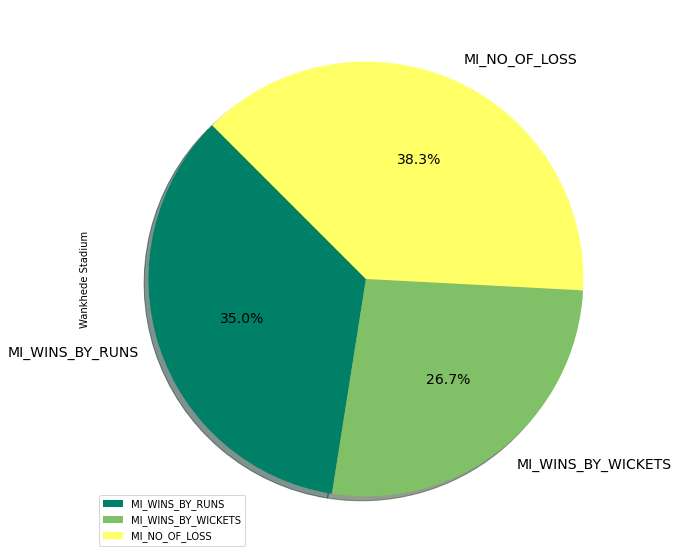

In [397]:
result.iloc[0, 1:4].plot(kind='pie', fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,10), shadow=True, startangle=135, legend=True, cmap='summer')


- **Mumbai Indians** played most matches at **Wankhede Stadium** where batting first helped them winning the match by 35%
- **Mumbai Indians** didnt played much matches at other venues, so stats at other venue are not relevent

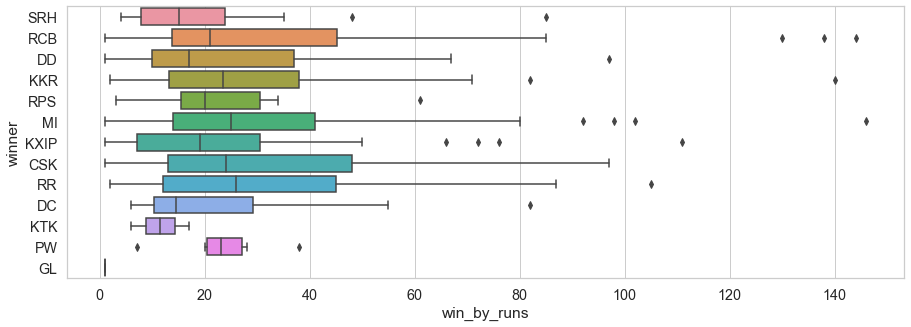

In [471]:
plt.figure(figsize=(15,5))
ax.set_ylim([0,20])
ax.set_title("Winning by Runs - Team Performance")
sns.boxplot(y = 'winner', x = 'win_by_runs', data=matches[matches['win_by_runs']>0], orient = 'h');
plt.show()

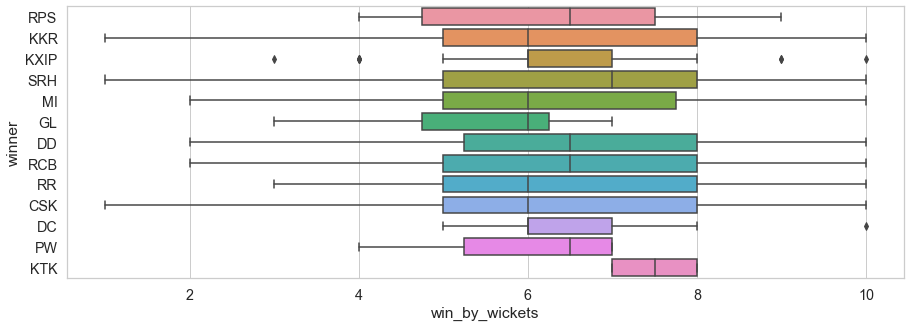

In [483]:
plt.figure(figsize=(15,5))
ax.set_ylim([0,20])
ax.set_title("Winning by Wickets - Team Performance")
sns.boxplot(y = 'winner', x = 'win_by_wickets', data=matches[matches['win_by_wickets']>0], orient = 'h'); #palette="Blues");
plt.show()

######  7.1.7 Against which team Mumbai Indians got the most defeats

In [369]:
mi_defeats = mi_matches[mi_matches['winner'] != "MI"]['winner'].value_counts().to_frame()
mi_defeats.rename(columns={'winner': 'number_of_defeats'}, inplace=True)
mi_defeats

,number_of_defeats
CSK,11
DD,11
KXIP,10
RCB,9
RR,8
SRH,7
KKR,5
RPS,4
DC,4
GL,2


- **CSK** and **DD** defeated MI 11 times

###### Top player of the match Winners######

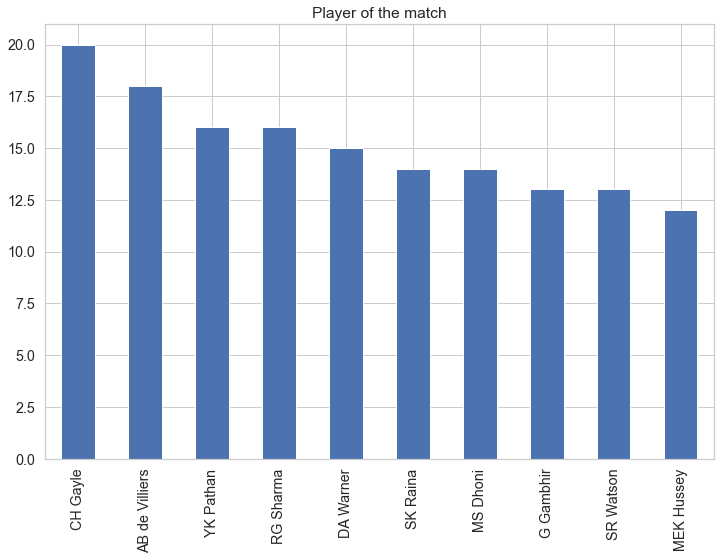

In [520]:
top_players = matches["player_of_match"].value_counts().head(10)
top_players.plot(kind="bar", title="Player of the match", figsize=(12,8))

---
<a name = Section8></a>                                                                      
# **8. Summary**                                                                                              
---

Mumbai Indians can opt to bat first at Feroz Shah Kotla as this stadium has most winning by runs 